# Análisis de series temporales con datos de temperaturas

In [1]:
# Importamos la librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error , root_mean_squared_error

# Importación y preparación de los datos

In [2]:
#Cargamos el archivo excel con los datos
df=pd.read_excel('T y HR.xlsx')
df.head()

,Año,Mes,Dia,Hora,Min,T0,HR0
0,2001,1,1,0,0,9.26,95.98
1,2001,1,1,1,0,9.56,95.72
2,2001,1,1,2,0,9.65,95.08
3,2001,1,1,3,0,9.88,94.93
4,2001,1,1,4,0,11.97,87.05


In [3]:
# Breve análisis estadístico del DataFrame
df.describe()

,Año,Mes,Dia,Hora,Min,T0,HR0
count,166536.000000,166536.000000,166536.000000,166536.000000,166536.0,166536.000000,166536.000000
mean,2010.000000,6.523418,15.728203,11.500000,0.0,17.239219,62.347417
std,5.476716,3.448579,8.799512,6.922207,0.0,8.937278,25.283286
min,2001.000000,1.000000,1.000000,0.000000,0.0,-6.510000,0.940000
25%,2005.000000,4.000000,8.000000,5.750000,0.0,10.490000,41.170000
50%,2010.000000,7.000000,16.000000,11.500000,0.0,16.070000,64.220000
75%,2015.000000,10.000000,23.000000,17.250000,0.0,23.490000,84.200000
max,2019.000000,12.000000,31.000000,23.000000,0.0,44.960000,100.000000


In [4]:
# Breve información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166536 entries, 0 to 166535
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     166536 non-null  int64  
 1   Mes     166536 non-null  int64  
 2   Dia     166536 non-null  int64  
 3   Hora    166536 non-null  int64  
 4   Min     166536 non-null  int64  
 5   T0      166536 non-null  float64
 6   HR0     166536 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 8.9 MB


In [5]:
# Eliminamos la columna con los valores de humedad 
df=df.drop(columns=['HR0'])
df.tail()

,Año,Mes,Dia,Hora,Min,T0
166531,2019,12,31,19,0,5.88
166532,2019,12,31,20,0,5.50
166533,2019,12,31,21,0,4.50
166534,2019,12,31,22,0,3.95
166535,2019,12,31,23,0,3.17


In [6]:
# Renombramos las columnas temporalmente
df = df.rename(columns={'Año': 'year', 'Mes': 'month', 'Dia': 'day', 'Hora': 'hour', 'Min': 'minute'})

# Creamos la columna para la fecha
df['Fecha'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Restauramos los nombres originales
df = df.rename(columns={'year': 'Año', 'month': 'Mes', 'day': 'Dia', 'hour': 'Hora', 'minute': 'Min'})
df.head()

,Año,Mes,Dia,Hora,Min,T0,Fecha
0,2001,1,1,0,0,9.26,2001-01-01 00:00:00
1,2001,1,1,1,0,9.56,2001-01-01 01:00:00
2,2001,1,1,2,0,9.65,2001-01-01 02:00:00
3,2001,1,1,3,0,9.88,2001-01-01 03:00:00
4,2001,1,1,4,0,11.97,2001-01-01 04:00:00


In [7]:
# Modificamos el dataframe para que el índice sea la fecha
df=df.set_index('Fecha')
df.to_csv('temperatura.csv',index=True)
df.tail()

,Año,Mes,Dia,Hora,Min,T0
Fecha,,,,,,
2019-12-31 19:00:00,2019,12,31,19,0,5.88
2019-12-31 20:00:00,2019,12,31,20,0,5.50
2019-12-31 21:00:00,2019,12,31,21,0,4.50
2019-12-31 22:00:00,2019,12,31,22,0,3.95
2019-12-31 23:00:00,2019,12,31,23,0,3.17


# Cálculo de valores medios diarios, mensuales y anuales

In [8]:
# Calculamos los promedios diarios, mensuales y anuales
promedio_diario = df['T0'].resample('D').mean()
promedio_mensual = df['T0'].resample('ME').mean()
promedio_anual = df['T0'].resample('YE').mean()

# Mostramos los resultados
print("Promedio Diario:")
print(promedio_diario.head())
print("Promedio Mensual:")
print(promedio_mensual.head())
print("\nPromedio Anual:")
print(promedio_anual.head())

Promedio Diario:
Fecha
2001-01-01    12.555417
2001-01-02    11.865833
2001-01-03    11.833333
2001-01-04    13.911667
2001-01-05    15.534167
Freq: D, Name: T0, dtype: float64
Promedio Mensual:
Fecha
2001-01-31    10.546465
2001-02-28    11.011548
2001-03-31    14.825806
2001-04-30    16.021875
2001-05-31    19.695296
Freq: ME, Name: T0, dtype: float64

Promedio Anual:
Fecha
2001-12-31    17.755726
2002-12-31    17.707218
2003-12-31    17.568603
2004-12-31    16.757641
2005-12-31    16.900952
Freq: YE-DEC, Name: T0, dtype: float64


# Cálculo de valores máximos y mínimos diarios, mensuales y anuales

In [9]:
# Calculamos el máximo y mínimo diario de la temperatura
maximo_diario = df['T0'].resample('D').max()
minimo_diario = df['T0'].resample('D').min()

# Mostramos los resultados
print("\nMáximo Diario:")
print(maximo_diario.head())
print("\nMínimo Diario:")
print(minimo_diario.head())


Máximo Diario:
Fecha
2001-01-01    14.02
2001-01-02    14.65
2001-01-03    13.17
2001-01-04    15.60
2001-01-05    17.85
Freq: D, Name: T0, dtype: float64

Mínimo Diario:
Fecha
2001-01-01     9.26
2001-01-02    10.47
2001-01-03    10.25
2001-01-04    12.85
2001-01-05    11.36
Freq: D, Name: T0, dtype: float64


In [10]:
# Calculamos el máximo y mínimo mensual de la temperatura
maximo_mensual = df['T0'].resample('ME').max()
minimo_mensual = df['T0'].resample('ME').min()

# Mostramos los resultados
print("\nMáximo Mensual:")
print(maximo_mensual.head())
print("\nMínimo Mensual:")
print(minimo_mensual.head())


Máximo Mensual:
Fecha
2001-01-31    19.63
2001-02-28    21.71
2001-03-31    26.79
2001-04-30    28.05
2001-05-31    38.52
Freq: ME, Name: T0, dtype: float64

Mínimo Mensual:
Fecha
2001-01-31    1.33
2001-02-28    1.96
2001-03-31    4.80
2001-04-30    4.98
2001-05-31    4.05
Freq: ME, Name: T0, dtype: float64


In [11]:
# Calculamos el máximo y mínimo anual de la temperatura
maximo_anual = df['T0'].resample('YE').max()
minimo_anual = df['T0'].resample('YE').min()

# Mostramos los resultados
print("\nMáximo Anual:")
print(maximo_anual.head())
print("\nMínimo Anual:")
print(minimo_anual.head())


Máximo Anual:
Fecha
2001-12-31    41.41
2002-12-31    40.08
2003-12-31    43.28
2004-12-31    41.95
2005-12-31    43.25
Freq: YE-DEC, Name: T0, dtype: float64

Mínimo Anual:
Fecha
2001-12-31   -3.89
2002-12-31    0.65
2003-12-31   -3.50
2004-12-31   -3.54
2005-12-31   -5.93
Freq: YE-DEC, Name: T0, dtype: float64


# DataFrames

In [12]:
# Unimos los valores diarios promedios, máximos y mínimos
df_diario = pd.concat([promedio_diario, maximo_diario, minimo_diario], axis=1)

# Renombramos las columnas para mayor claridad
df_diario.columns = ['Promedio', 'Máximo', 'Mínimo']
df_diario.to_csv('temperatura_diaria.csv',index=True)
df_diario.head()

,Promedio,Máximo,Mínimo
Fecha,,,
2001-01-01,12.555417,14.02,9.26
2001-01-02,11.865833,14.65,10.47
2001-01-03,11.833333,13.17,10.25
2001-01-04,13.911667,15.60,12.85
2001-01-05,15.534167,17.85,11.36


In [13]:
# Unimos los valores mensuales promedios, máximos y mínimos
df_mensual = pd.concat([promedio_mensual, maximo_mensual, minimo_mensual], axis=1)

# Renombramos las columnas para mayor claridad
df_mensual.columns = ['Promedio', 'Máximo', 'Mínimo']
df_mensual.to_csv('temperatura_mensual.csv',index=True)
df_mensual.head()

,Promedio,Máximo,Mínimo
Fecha,,,
2001-01-31,10.546465,19.63,1.33
2001-02-28,11.011548,21.71,1.96
2001-03-31,14.825806,26.79,4.80
2001-04-30,16.021875,28.05,4.98
2001-05-31,19.695296,38.52,4.05


In [14]:
# Unimos los valores mensuales promedios, máximos y mínimos
df_anual = pd.concat([promedio_anual, maximo_anual, minimo_anual], axis=1)

# Renombramos las columnas para mayor claridad
df_anual.columns = ['Promedio', 'Máximo', 'Mínimo']
df_anual.to_csv('temperatura_anual.csv',index=True)
df_anual.head()

,Promedio,Máximo,Mínimo
Fecha,,,
2001-12-31,17.755726,41.41,-3.89
2002-12-31,17.707218,40.08,0.65
2003-12-31,17.568603,43.28,-3.50
2004-12-31,16.757641,41.95,-3.54
2005-12-31,16.900952,43.25,-5.93


# Descripción y dibujo de las series

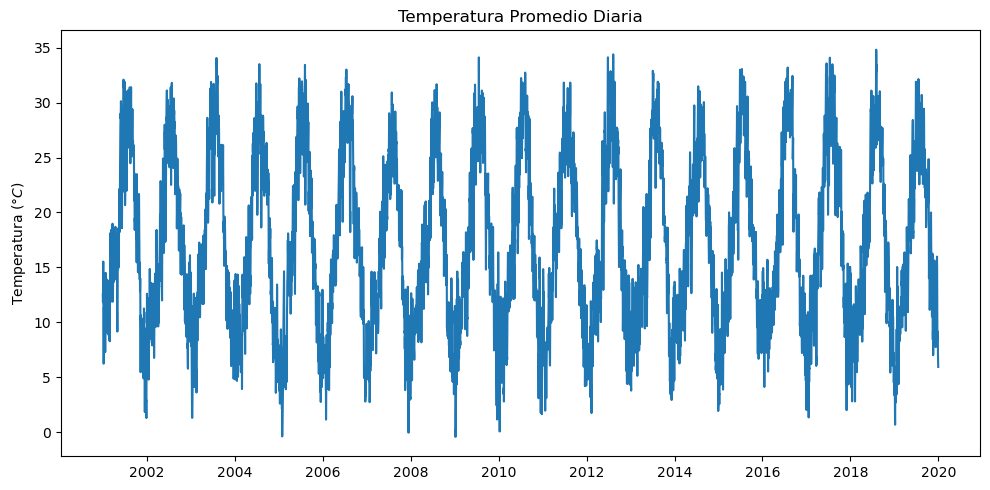

In [15]:
# Gráfico de temperatura promedio diaria
plt.figure(figsize=(10,5))
plt.plot(promedio_diario.index, promedio_diario.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Promedio Diaria')
plt.tight_layout()
plt.show()

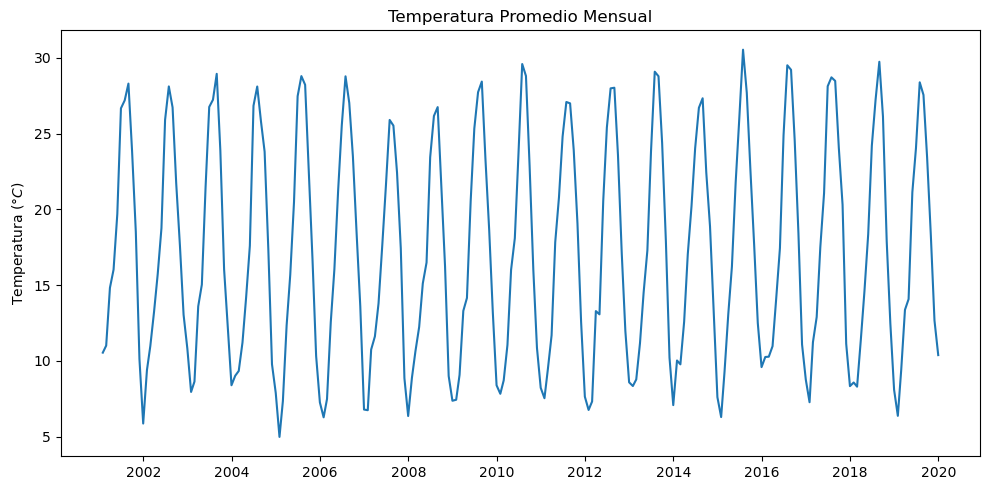

In [16]:
# Gráfico de temperatura promedio mensual
plt.figure(figsize=(10,5))
plt.plot(promedio_mensual.index, promedio_mensual.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Promedio Mensual')
plt.tight_layout()
plt.show()

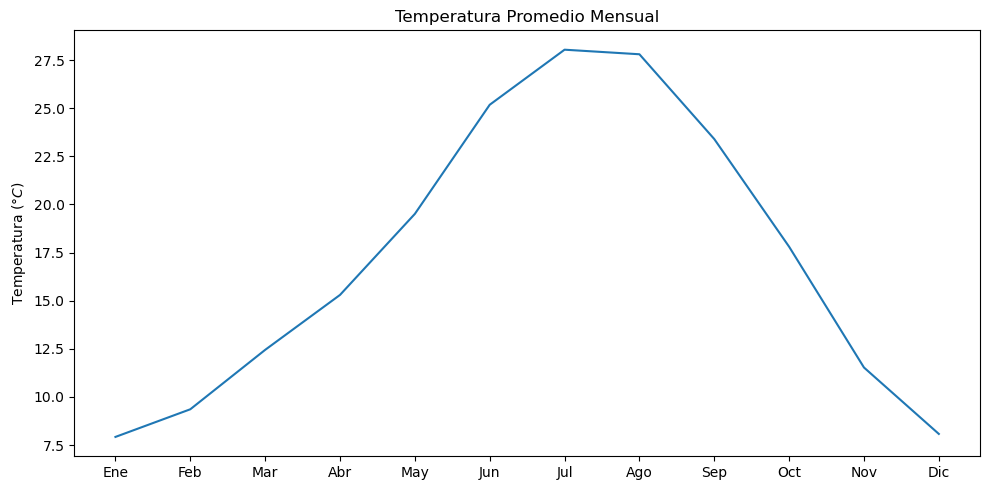

In [17]:
# Para mostrar los meses en el eje x
promedio_mensual_simple = promedio_mensual.groupby(promedio_mensual.index.month).mean()

# Gráfico de temperatura promedio mensual
plt.figure(figsize=(10,5))
plt.plot(promedio_mensual_simple.index, promedio_mensual_simple.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Promedio Mensual')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

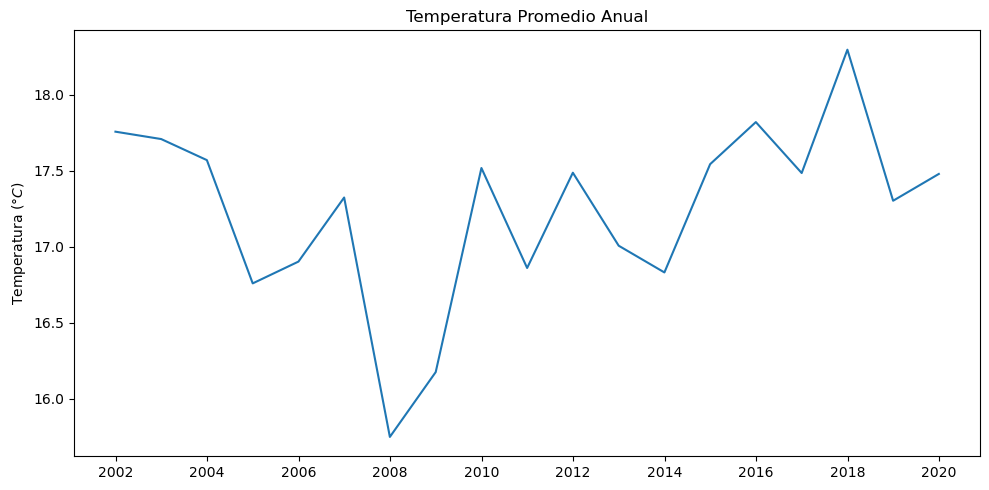

In [18]:
# Gráfico de temperatura promedio anual
plt.figure(figsize=(10,5))
plt.plot(promedio_anual.index, promedio_anual.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Promedio Anual')
plt.tight_layout()
plt.show()

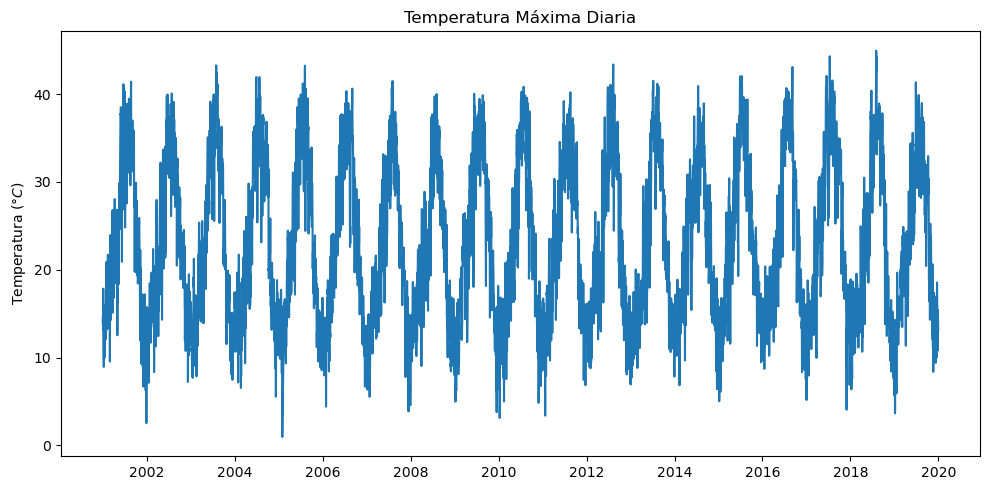

In [19]:
# Gráfico de temperatura máxima diaria
plt.figure(figsize=(10,5))
plt.plot(maximo_diario.index, maximo_diario.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Máxima Diaria')
plt.tight_layout()
plt.show()

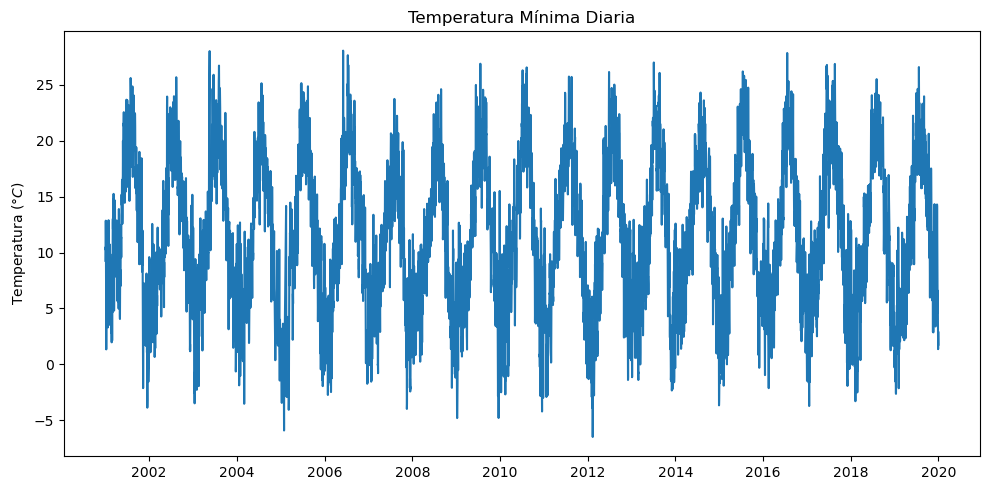

In [20]:
# Gráfico de temperatura mínima diaria
plt.figure(figsize=(10,5))
plt.plot(minimo_diario.index, minimo_diario.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Mínima Diaria')
plt.tight_layout()
plt.show()

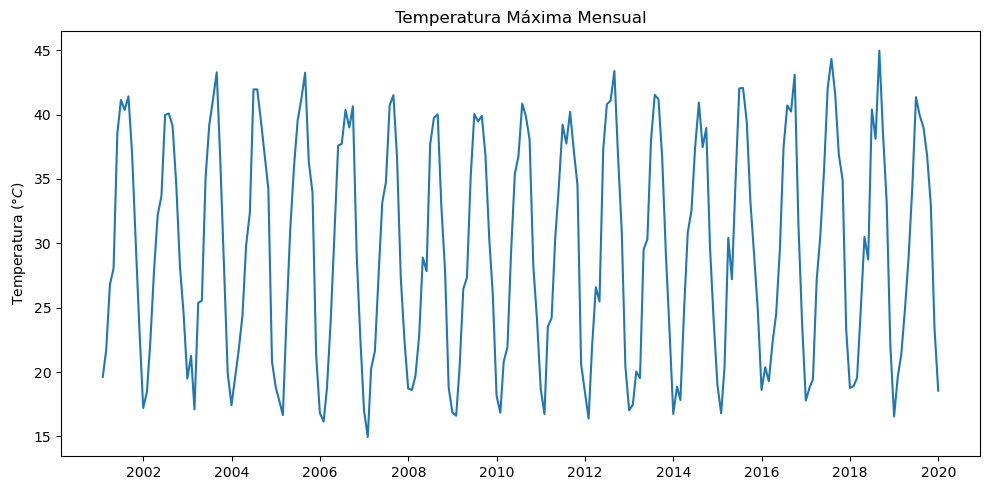

In [21]:
# Gráfico de temperatura máxima mensual
plt.figure(figsize=(10,5))
plt.plot(maximo_mensual.index, maximo_mensual.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Máxima Mensual')
plt.tight_layout()
plt.show()

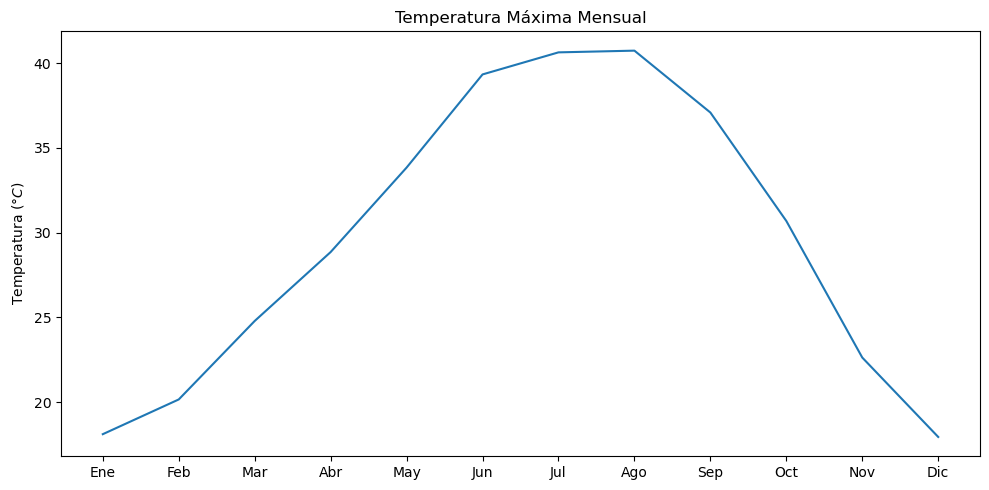

In [22]:
# Para mostrar los meses en el eje x
maximo_mensual_simple = maximo_mensual.groupby(maximo_mensual.index.month).mean()

# Gráfico de temperatura máxima mensual
plt.figure(figsize=(10,5))
plt.plot(maximo_mensual_simple.index, maximo_mensual_simple.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Máxima Mensual')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

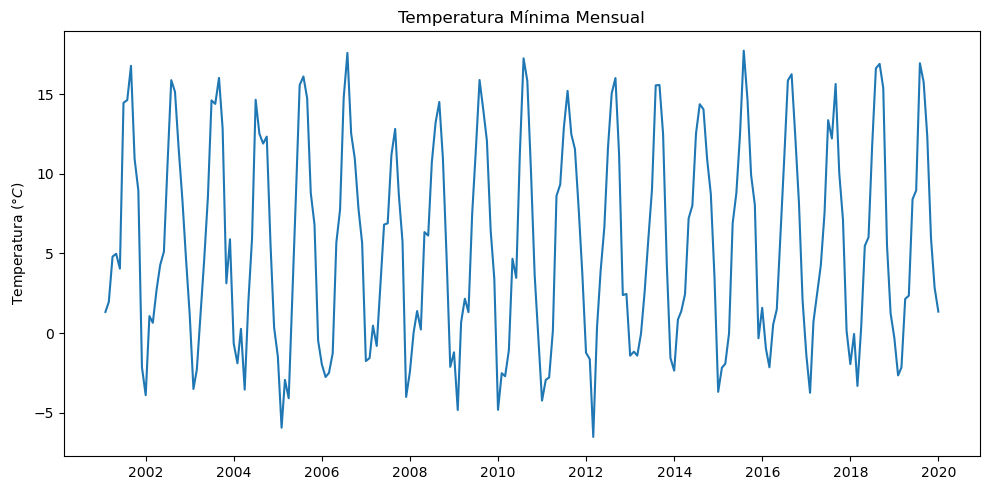

In [23]:
# Gráfico de temperatura mínima mensual
plt.figure(figsize=(10,5))
plt.plot(minimo_mensual.index, minimo_mensual.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Mínima Mensual')
plt.tight_layout()
plt.show()

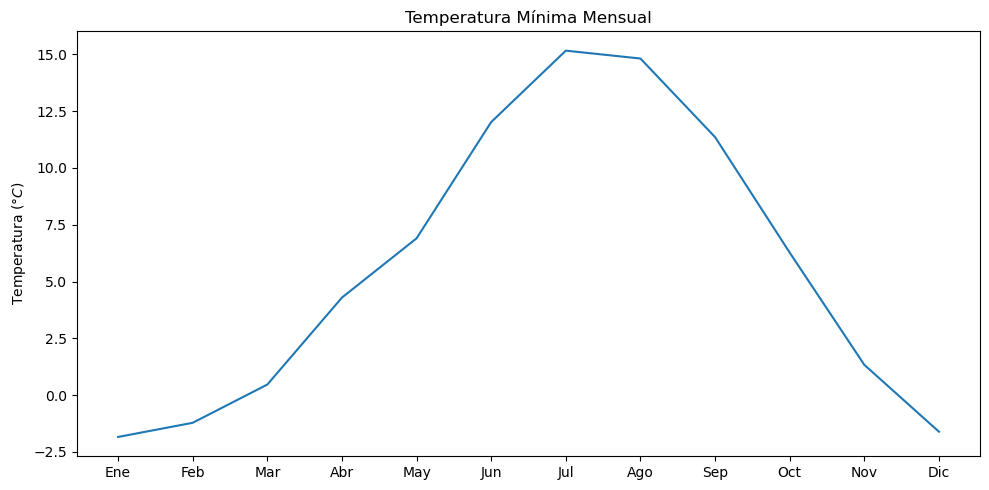

In [24]:
# Para mostrar los meses en el eje x
minimo_mensual_simple = minimo_mensual.groupby(minimo_mensual.index.month).mean()

# Gráfico de temperatura mínima mensual
plt.figure(figsize=(10,5))
plt.plot(minimo_mensual_simple.index, minimo_mensual_simple.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Mínima Mensual')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

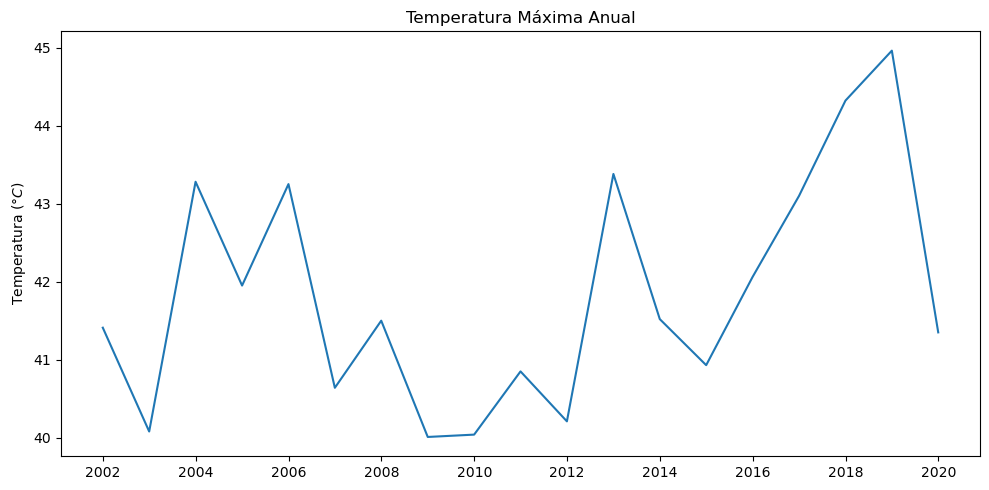

In [25]:
# Gráfico de temperatura máxima anual
plt.figure(figsize=(10,5))
plt.plot(maximo_anual.index, maximo_anual.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Máxima Anual')
plt.tight_layout()
plt.show()

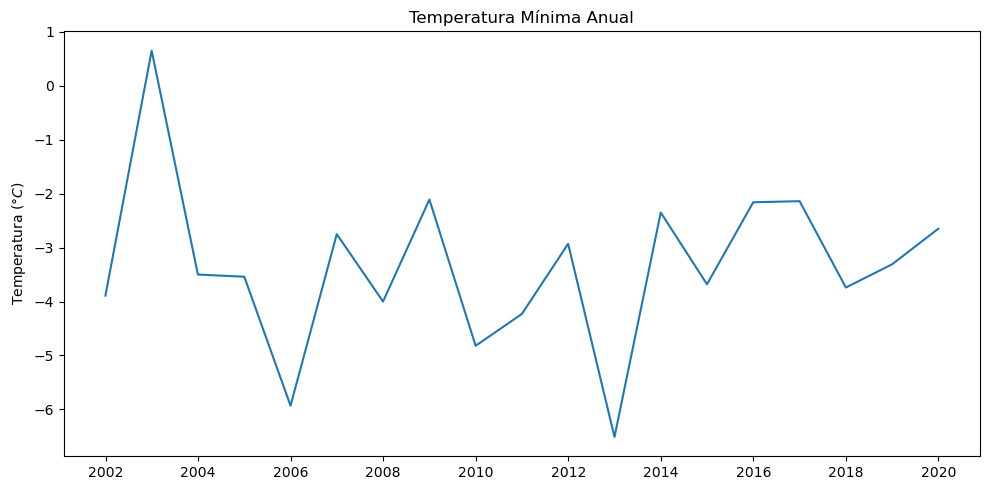

In [26]:
# Gráfico de temperatura mínima anual
plt.figure(figsize=(10,5))
plt.plot(minimo_anual.index, minimo_anual.values)
plt.ylabel(r'Temperatura $(°C)$')
plt.title('Temperatura Mínima Anual')
plt.tight_layout()
plt.show()

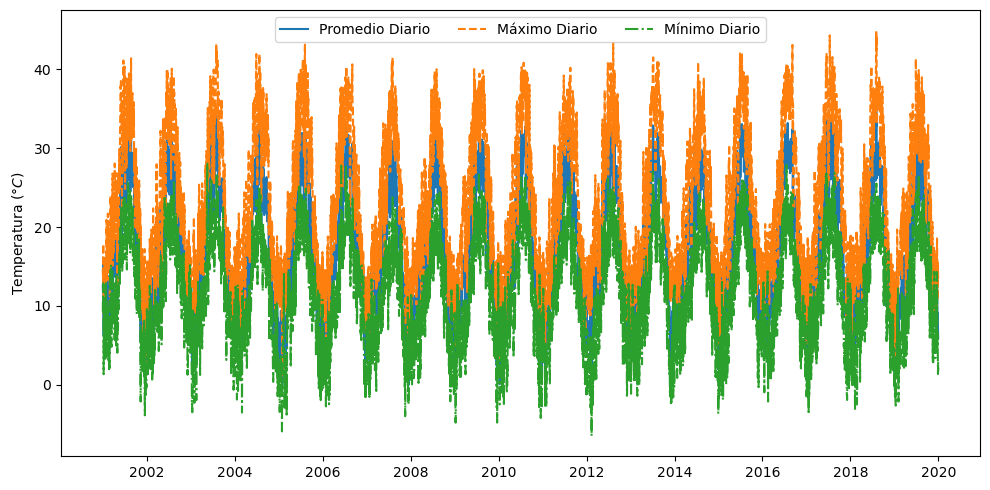

In [27]:
# Gráfico de promedio, máximo y mínimo diario
plt.figure(figsize=(10,5))
plt.plot(promedio_diario.index, promedio_diario.values, label='Promedio Diario')
plt.plot(maximo_diario.index, maximo_diario.values, label='Máximo Diario', linestyle='--')
plt.plot(minimo_diario.index, minimo_diario.values, label='Mínimo Diario', linestyle='dashdot')
plt.ylabel(r'Temperatura $(°C)$')
plt.legend(loc='upper center', ncol=3)
plt.tight_layout()
plt.show()

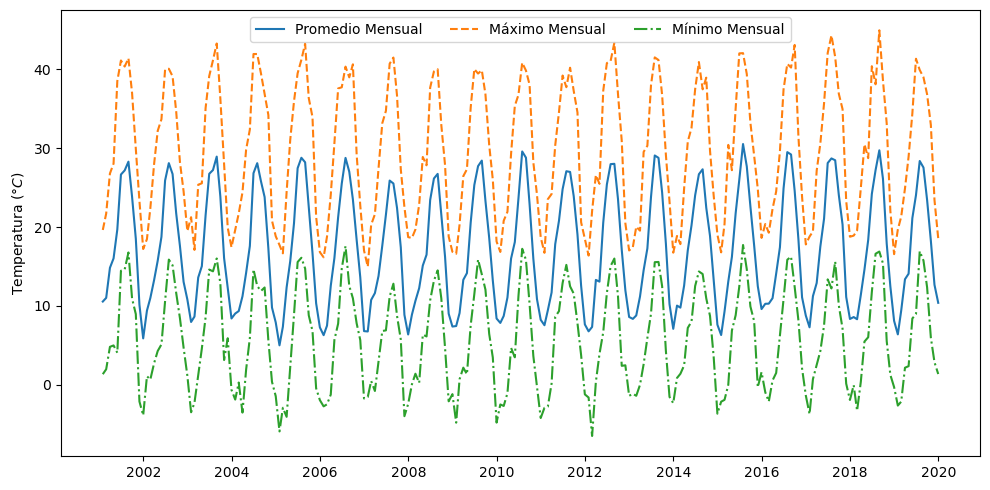

In [28]:
# Gráfico de promedio, máximo y mínimo mensual
plt.figure(figsize=(10,5))
plt.plot(promedio_mensual.index, promedio_mensual.values, label='Promedio Mensual')
plt.plot(maximo_mensual.index, maximo_mensual.values, label='Máximo Mensual', linestyle='--')
plt.plot(minimo_mensual.index, minimo_mensual.values, label='Mínimo Mensual',linestyle='dashdot')
plt.ylabel(r'Temperatura $(°C)$')
plt.legend(loc='upper center',ncol=3)
plt.tight_layout()
plt.show()

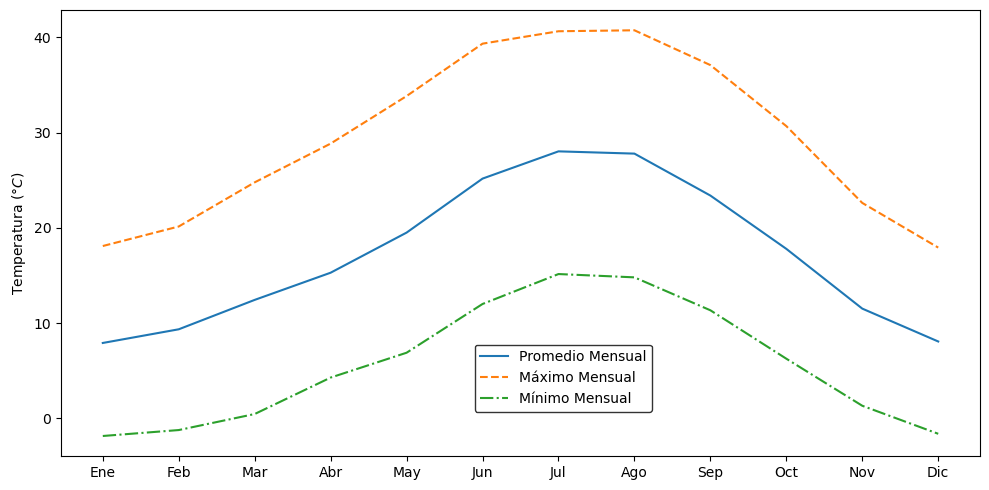

In [29]:
# Gráfico de promedio, máximo y mínimo mensual
plt.figure(figsize=(10,5))
plt.plot(promedio_mensual_simple.index, promedio_mensual_simple.values, label='Promedio Mensual')
plt.plot(maximo_mensual_simple.index, maximo_mensual_simple.values, label='Máximo Mensual', linestyle='--')
plt.plot(minimo_mensual_simple.index, minimo_mensual_simple.values, label='Mínimo Mensual', linestyle='dashdot')
plt.ylabel(r'Temperatura $(°C)$')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(loc=(0.45,0.1), edgecolor='black')
plt.tight_layout()
plt.show()

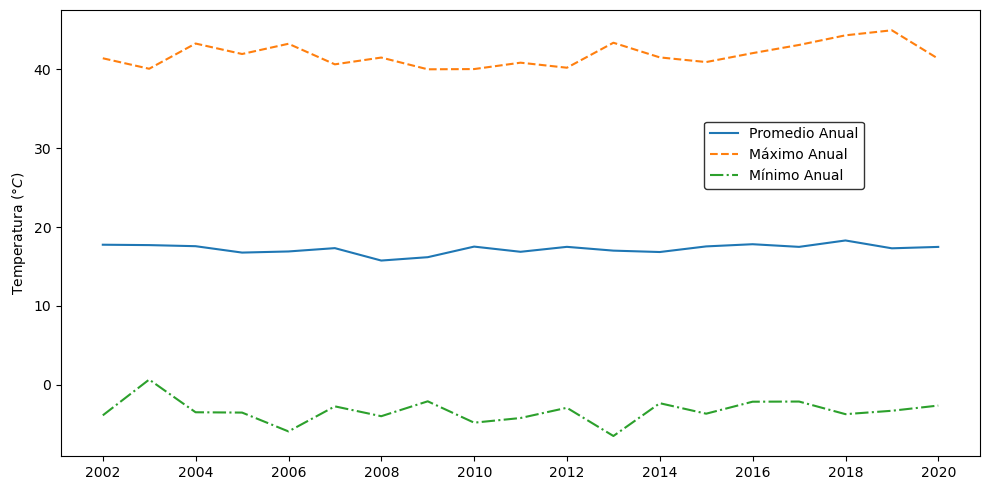

In [30]:
# Gráfico de promedio, máximo y mínimo anual
plt.figure(figsize=(10,5))
plt.plot(promedio_anual.index, promedio_anual.values, label='Promedio Anual')
plt.plot(maximo_anual.index, maximo_anual.values, label='Máximo Anual', linestyle='--')
plt.plot(minimo_anual.index, minimo_anual.values, label='Mínimo Anual', linestyle='dashdot')
plt.ylabel(r'Temperatura $(°C)$')
plt.legend(loc=(0.7,0.6), edgecolor='black')
plt.tight_layout()
plt.show()

# Tratamiento de tendencias

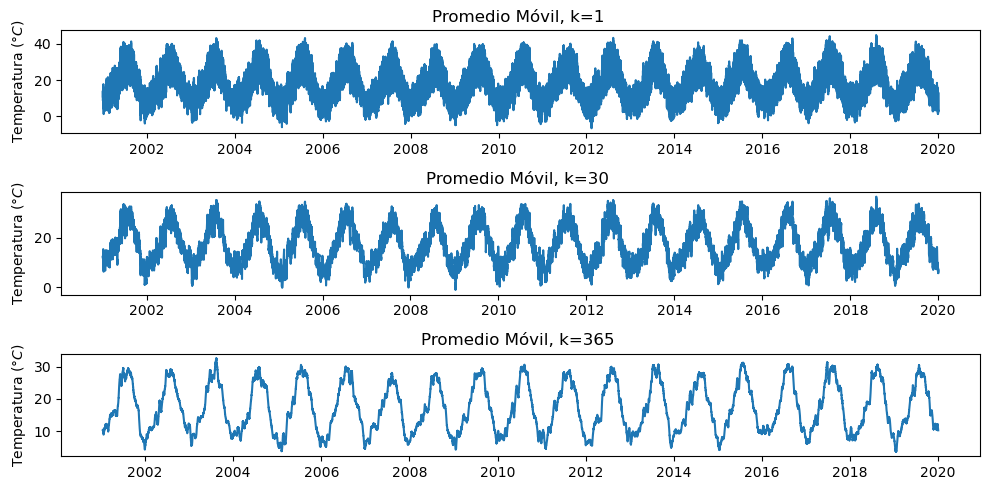

In [31]:
# Graficamos las diferentes series con diferentes medias móvile
medias_moviles = [1,30,365]
plt.figure(figsize=(10, 5))

for i, k in enumerate(medias_moviles, start=1):
    # Calculamos el promedio móvil para cada ventana
    promedio_movil = df['T0'].rolling(window=k).mean()

    # Creamos un gráfico separado para cada media móvil
    plt.subplot(len(medias_moviles), 1, i)
    plt.plot(df.index, promedio_movil, label=f'Promedio Móvil (k={k})')
    plt.title(f'Promedio Móvil, k={k} ')
    plt.ylabel(r'Temperatura $(°C)$')
    plt.xlabel('')
    plt.tight_layout()

plt.show()

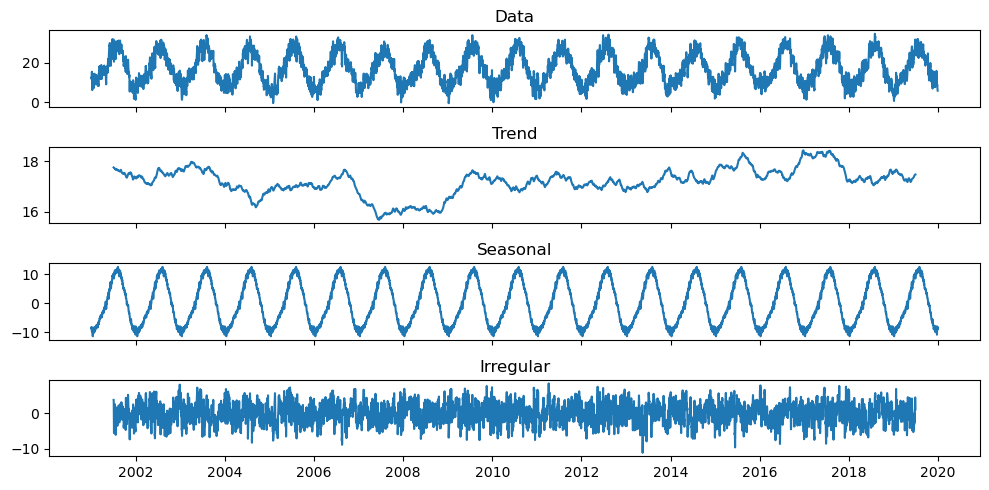

In [32]:
# Realizamos la descomposición de la serie temporal
descomposicion = seasonal_decompose(promedio_diario, model='additive', period=365)

# Asignamos variables a cada descomposición estacional
trend = descomposicion.trend
seasonal = descomposicion.seasonal
irregular = descomposicion.resid

# Graficamos los resultados de la descomposición con dimensiones ajustadas
fig, axes = plt.subplots(4, 1, figsize=(10, 5), sharex=True)

axes[0].plot(descomposicion.observed)
axes[0].set_title('Data')
axes[1].plot(trend)
axes[1].set_title('Trend')
axes[2].plot(seasonal)
axes[2].set_title('Seasonal')
axes[3].plot(irregular)
axes[3].set_title('Irregular')

plt.tight_layout()
plt.show()

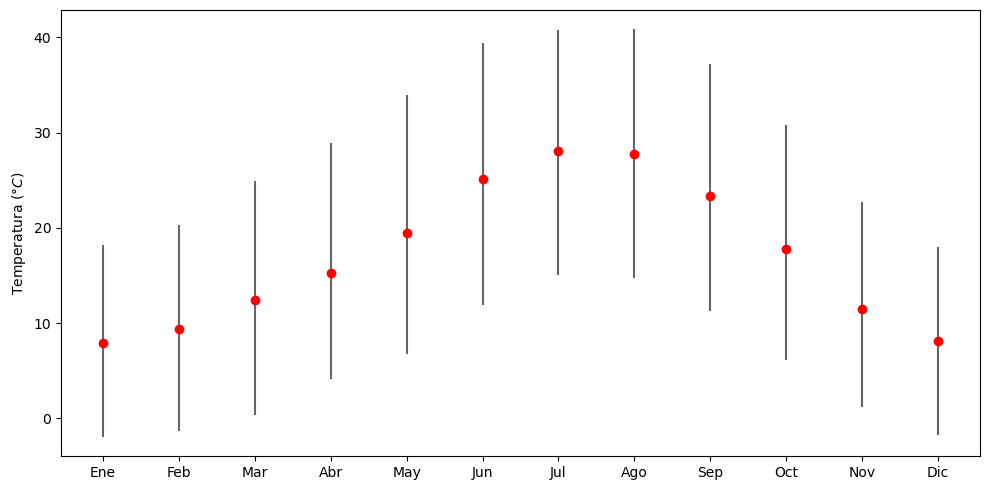

In [33]:
# Agrupamos los valores calculados previamente por mes
rango_mensual = pd.DataFrame({
    'min': minimo_mensual.groupby(minimo_mensual.index.month).mean(),
    'max': maximo_mensual.groupby(maximo_mensual.index.month).mean(),
    'mean': promedio_mensual.groupby(promedio_mensual.index.month).mean()
})

# Graficamos el Month Plot
plt.figure(figsize=(10, 5))
for mes in rango_mensual.index:
    plt.plot([mes, mes], [rango_mensual.loc[mes, 'min'], rango_mensual.loc[mes, 'max']], color='black', alpha=0.6)
    plt.plot(mes, rango_mensual.loc[mes, 'mean'], 'o', color='red')

plt.xlabel('')
plt.ylabel(r'Temperatura $(°C)$')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

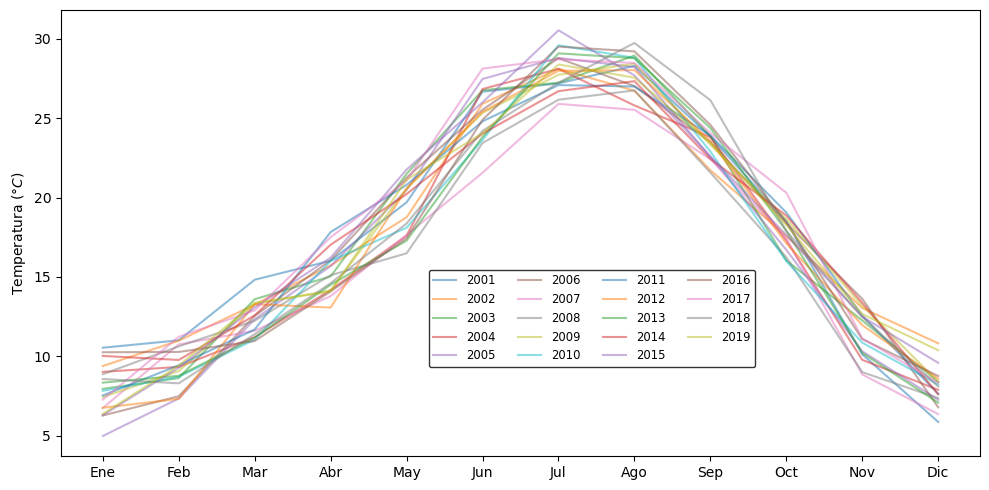

In [34]:
# Creamos el gráfico tipo Season Plot
plt.figure(figsize=(10, 5))

# Agrupamos por año y mes a partir del promedio mensual calculado
for year in promedio_mensual.index.year.unique():
    # Filtramos los datos del año específico
    datos_anuales = promedio_mensual[promedio_mensual.index.year == year]
    plt.plot(range(1, 13), datos_anuales.groupby(datos_anuales.index.month).mean(), label=str(year), alpha=0.5)

plt.xlabel('')
plt.ylabel(r'Temperatura $(°C)$')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(loc=(0.4, 0.2), ncol=4, fontsize='small', edgecolor='black')
plt.tight_layout()
plt.show()

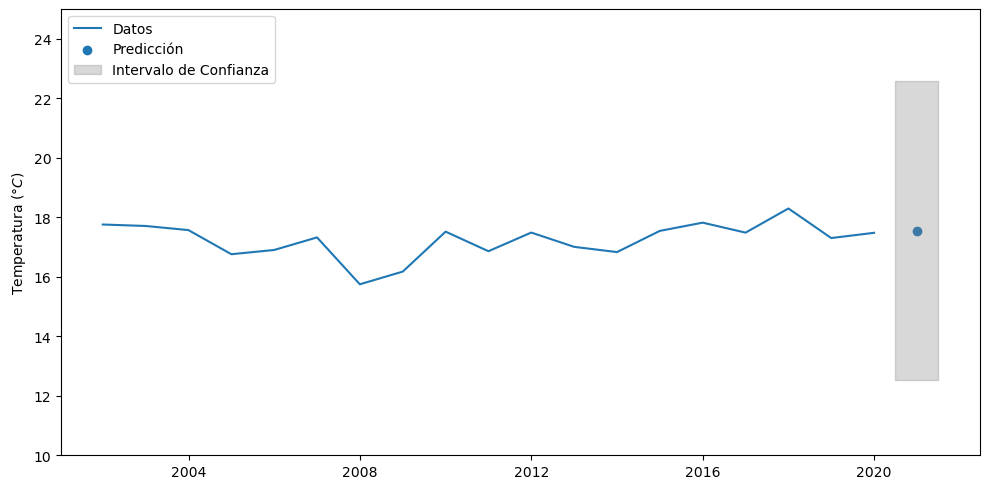

In [35]:
# Aplicamos el modelo de suavizamiento exponencial
model = ExponentialSmoothing(promedio_anual.values).fit()

# Establecemos la predicción para el próximo año
forecast = model.forecast(steps=1)

# Establecemos el intervalo de confianza
conf_int = [forecast[0] - 1.96 * model.sse**0.5, forecast[0] + 1.96 * model.sse**0.5]

# Establecemos la fecha para la predicción (avanzamos un año desde la última fecha)
next_year = promedio_anual.index[-1] + pd.DateOffset(years=1)

# Graficamos los resultados
plt.figure(figsize=(10,5))
plt.plot(promedio_anual.index, promedio_anual.values, label='Datos')
plt.scatter(next_year, forecast, label='Predicción')
plt.fill_betweenx([conf_int[0], conf_int[1]], next_year - pd.DateOffset(months=6), next_year + pd.DateOffset(months=6),
                  color='gray', alpha=0.3, label='Intervalo de Confianza') 
plt.ylim(10, 25)
plt.ylabel(r'Temperatura $(°C)$')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Establecemos la predicción
predicciones_in_sample = model.fittedvalues

# Establecemos los valores reales de la serie
valores_reales = promedio_anual.values

# Calculamos las métricas de error
mae1 = mean_absolute_error(valores_reales, predicciones_in_sample)
rmse1 = root_mean_squared_error(valores_reales, predicciones_in_sample)
me1 = (valores_reales - predicciones_in_sample).mean()

# Mostramos las métricas de error
print(f"Mean Absolute Error (MAE): {mae1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.2f}")
print(f"Mean Error (ME): {me1:.2f}")

Mean Absolute Error (MAE): 0.45
Root Mean Squared Error (RMSE): 0.59
Mean Error (ME): 0.01


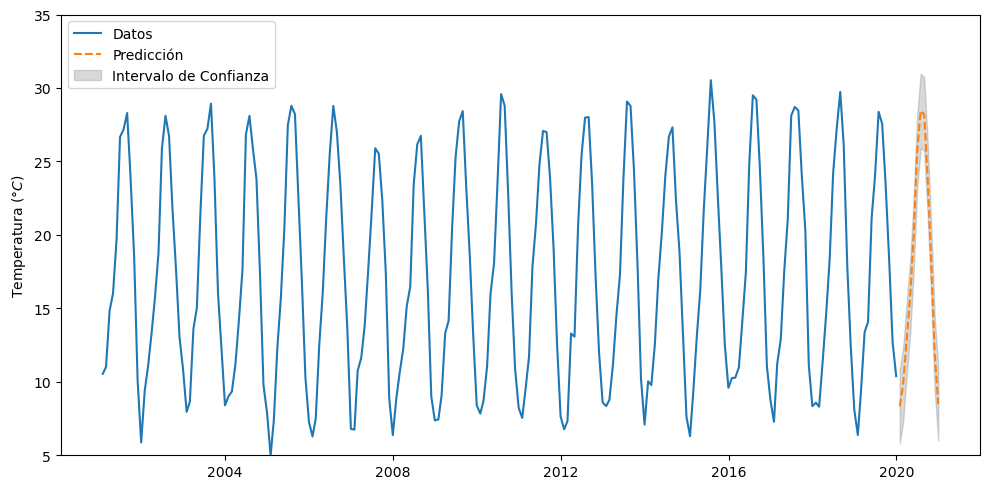

In [37]:
# Creamos el modelo Holt-Winters
modelo = ExponentialSmoothing(
    promedio_mensual, 
    seasonal="add", 
    seasonal_periods=12
).fit()

# Generamos predicciones para 12 meses
predicciones = modelo.forecast(steps=12)

# Calculamos intervalos de confianza
sse = modelo.sse
confianza_superior = predicciones + 2 * (sse / len(promedio_mensual))**0.5
confianza_inferior = predicciones - 2 * (sse / len(promedio_mensual))**0.5

# Gráfico los resultados
plt.figure(figsize=(10, 5))
plt.plot(promedio_mensual.index, promedio_mensual.values, label='Datos')
plt.plot(predicciones.index, predicciones.values, label='Predicción', linestyle='--')

# Intervalos de confianza
plt.fill_between(
    predicciones.index,
    confianza_inferior,
    confianza_superior,
    color='gray',
    alpha=0.3,
    label='Intervalo de Confianza'
)
plt.ylabel(r'Temperatura $(°C)$')
plt.ylim(5, 35)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
# Asignamos los datos reales y las predicciones
reales = promedio_mensual.values[-12:]
predichos = predicciones.values[:12]

# Calculamos las métricas de error
mae2 = mean_absolute_error(reales, predichos)
rmse2 = root_mean_squared_error(reales, predichos)
me2 = np.mean(predichos - reales)

print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.2f}")
print(f"Mean Error (ME): {me2:.2f}")

Mean Absolute Error (MAE): 0.91
Root Mean Squared Error (RMSE): 1.13
Mean Error (ME): 0.18
